# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
-0.001
-0.001
-0.001
0.0
0.0
-0.002
-0.002
0.999
1.002
1.002
1.001
1.001
1.973
1.977
1.977
1.976
1.977
2.948
2.95
2.951
2.951
2.952
3.925
3.927
3.928
3.927
3.927
4.929
4.929
4.928
4.927
5.931
5.931
5.929
5.929
6.522
6.524
6.525
6.524
6.524
7.101
7.103
7.104
7.104
7.105
8.077
8.081
8.081
8.079
8.079
9.053
9.054
9.057
9.055
9.055
10.027
10.032
10.031
10.03
10.03
11.035
11.035
11.035
11.034
12.038
12.038
12.037
12.037
13.009
13.014
13.014
13.013
13.013
13.674
13.675
13.677
13.676
13.677
14.314
14.315
14.317
14.317
14.317
14.317
15.29
15.29
15.289
15.29
16.286
16.29
16.29
16.289
16.29
17.258
17.262
17.262
17.26
17.262
18.234
18.233
18.233
18.233
19.208
19.208
19.208
19.207
20.175
20.18
20.18
20.179
20.795
20.8
20.799
20.799
21.43
21.43
21.428
21.428
22.419
22.419
22.417
22.416
23.42
23.42
23.419
23.418
24.407
24.407
24.405
24.405
25.409
25.408
25.407
25.406
26.41
26.41
26.409
26.408
27.387
27.387
27.

55.811
55.811
55.811
55.811
55.811
55.811
55.811
55.811
55.811
55.811
55.811
55.811
55.81
55.81
55.81
55.81
55.81
55.809
55.808
55.808
56.134
56.134
56.132
56.132
56.131
56.131
56.13
56.13
56.13
56.13
56.13
56.13
56.13
56.13
56.129
56.129
56.129
56.129
56.129
56.128
56.128
56.128
56.128
56.128
56.128
56.127
56.128
56.128
56.128
56.128
56.128
56.128
56.128
56.128
56.127
56.127
56.126
56.126
56.125
56.125
56.125
56.376
56.371
56.371
56.372
56.372
56.399
56.403
56.405
56.425
56.425
56.425
56.424
56.424
56.424
56.423
56.423
56.422
56.422
56.422
56.422
56.422
56.422
56.421
56.421
56.421
56.42
56.42
56.42
56.42
56.42
56.42
56.42
56.42
56.419
56.419
56.419
56.419
56.419
56.419
56.42
56.42
56.419
56.419
56.419
56.418
56.418
56.417
56.416
56.416
56.679
56.679
56.679
56.679
56.679
56.679
56.679
56.679
56.678
56.682
56.68
56.68
56.679
56.679
56.678
56.678
56.677
56.677
56.677
56.677
56.677
56.676
56.676
56.676
56.675
56.675
56.675
56.675
56.675
56.675
56.675
56.675
56.675
56.675
56.675
56.675
56.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1494,2988,59.261
1495,2990,59.261
1496,2992,59.261
1497,2994,59.261


<IPython.core.display.Javascript object>


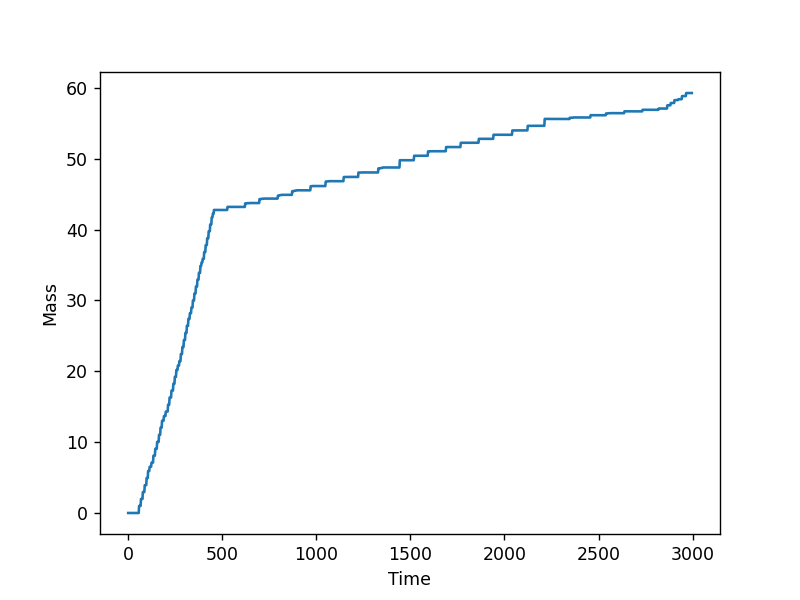

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_220523_S493-498.csv')